##Utilities


In [ ]:
#Basic Python and Machine learning libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
import sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install demoji
!pip install bertopic
nltk.download('all')
import demoji

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
senwave = pd.read_csv("/content/drive/MyDrive/Senwave/labeledEn.csv")
print("Length of Senwave Dataset = {}".format(len(senwave)))

Length of Senwave Dataset = 10000


In [ ]:
senwave.head()

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,1245138832040890370,A glass of wine keeps the corona away- DRAKE. ...,1,0,0,0,0,0,0,0,0,0,1
1,1245138859874234368,Can Anyone tell me if you took the flu shot la...,0,0,0,0,1,0,0,0,0,1,0
2,1245138869353353222,Btw producers send me beats Im working on musi...,1,0,0,0,0,0,0,0,0,0,1
3,1245138873740648448,When someone you know.. apart of your family d...,0,0,0,0,0,1,0,0,0,0,0
4,1245138886172585989,"Dear soccer, I really miss you ,please come ba...",0,0,0,0,0,1,1,0,0,0,0


In [ ]:
senwave.info

<bound method DataFrame.info of                        ID  ... Joking
0     1245138832040890370  ...      1
1     1245138859874234368  ...      0
2     1245138869353353222  ...      1
3     1245138873740648448  ...      0
4     1245138886172585989  ...      0
...                   ...  ...    ...
9995  1250089222435934208  ...      1
9996  1250089234519785477  ...      0
9997  1250089235052466177  ...      0
9998  1250089344091725827  ...      1
9999  1250089370020970496  ...      0

[10000 rows x 13 columns]>

##Feature Extraction

In [ ]:
df = pd.DataFrame(columns=['Tweet'])
df['Tweet'] = senwave['Tweet'].astype(str)
df[:5]

,Tweet
0,A glass of wine keeps the corona away- DRAKE. ...
1,Can Anyone tell me if you took the flu shot la...
2,Btw producers send me beats Im working on musi...
3,When someone you know.. apart of your family d...
4,"Dear soccer, I really miss you ,please come ba..."


##Cleaning the Data


In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
words = clean(''.join(str(senwave['Tweet'].tolist())))

In [ ]:
words[:30]

['glass',
 'wine',
 'keep',
 'corona',
 'away',
 'drake',
 'se',
 'diga',
 'm',
 'cheer',
 'anyone',
 'tell',
 'took',
 'flu',
 'shot',
 'last',
 'year',
 'give',
 'positive',
 'result',
 'coronavirus',
 'even',
 'dont',
 'btw',
 'producer',
 'send',
 'beat',
 'im',
 'working',
 'music']

N-gram Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

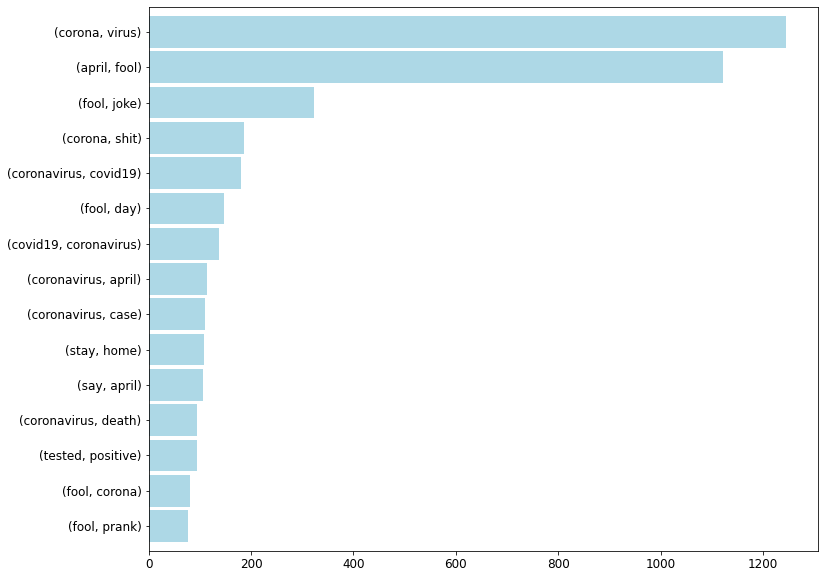

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'lightblue', width = 0.9, figsize = (12, 10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

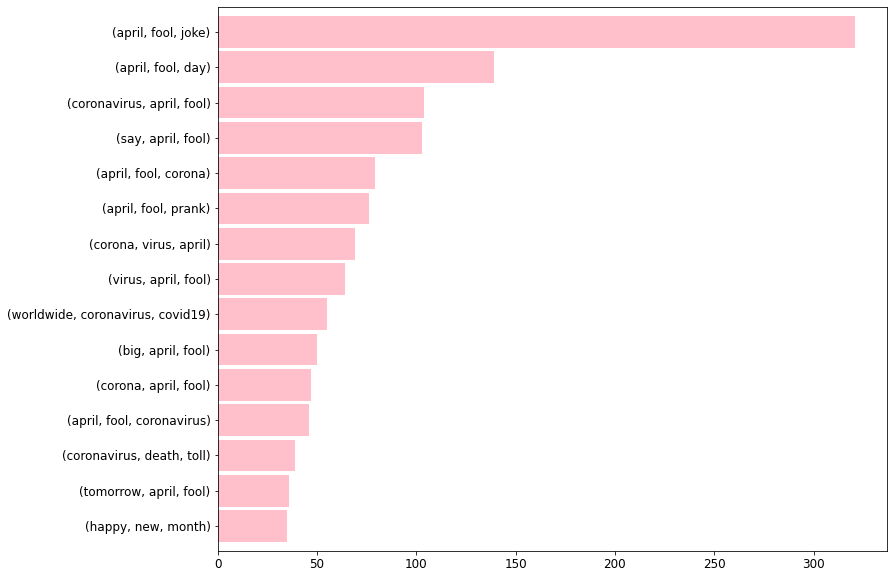

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (12, 10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


##Preprocessing the data

In [ ]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [ ]:
contractionsWithAnotherInvertedComma = { 
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [ ]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions
    
    def lower(self, tweet):
        return tweet.lower()
    
    def abbreviate(self, tweet):
        tweet = tweet.split(' ')
        j = 0
        for str_ in tweet:
            fileName = '/content/drive/MyDrive/Senwave/Abbreviations.txt'
            accessMode = 'r'
            with open(fileName, accessMode) as csvfile:
                dataFromFile = csv.reader(csvfile, delimiter = '=')
                str_ = re.sub('[^a-zA-Z0-9-_.]', '', str_)
                for row in dataFromFile:
                    if str_.upper() == row[0]:
                        tweet[j] = row[1]
                csvfile.close()
            j += 1
        return ' '.join(tweet)
    
    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet
    
    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])
        
        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)
    
    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)
    
    def preprocess_tweet(self, tweet):
        tweet = self.lower(tweet)
        tweet = self.abbreviate(tweet)
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [ ]:
pp_class = preprocess(senwave, contractions, contractionsWithAnotherInvertedComma)
senwave['Tweet'] = senwave['Tweet'].apply(lambda x : pp_class.preprocess_tweet(x))

In [ ]:
senwave['Tweet'] = senwave['Tweet'].str.lower()
senwave.head(5)

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,1245138832040890370,a glass of wine keeps the corona away drake ...,1,0,0,0,0,0,0,0,0,0,1
1,1245138859874234368,can anyone tell me if you took the flu shot la...,0,0,0,0,1,0,0,0,0,1,0
2,1245138869353353222,by the way producers send me beats im working ...,1,0,0,0,0,0,0,0,0,0,1
3,1245138873740648448,when someone you know apart of your family d...,0,0,0,0,0,1,0,0,0,0,0
4,1245138886172585989,dear soccer i really miss you please come ba...,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
def check_coverage(vocab, embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:
            oov[word] = vocab[word]
            i += vocab[word]
            pass
        
    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key = operator.itemgetter(1))[::-1]

    return sorted_x

def build_vocab(sentences, verbose = True):
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except:
                vocab[word] = 1
    return vocab

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

def load_embeddings(path):
    with open(path, encoding = "utf-8") as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in f)


def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix

##Topic Modelling

Tokenizing

In [ ]:
freqX = pd.Series(
    ' '.join(df['Tweet']).split()).value_counts()[:10]

print('FREQ X: \n', freqX)

FREQ X: 
 the            5025
to             4035
a              2599
corona         2535
is             2439
and            2344
of             2308
coronavirus    2307
I              2288
in             2012
dtype: int64


In [ ]:
custom_stopwords = ['t', 'rt', 'ti', 'vk', 'to', 'co',
                    'dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

In [ ]:
df['Tweet'] = df['Tweet'].apply(
    lambda x: [item for item in x.split() if item not in STOP_WORDS])

In [ ]:
df['Tweet']

0       [A, glass, wine, keeps, corona, away-, DRAKE.,...
1       [Can, Anyone, tell, took, flu, shot, last, yea...
2       [Btw, producers, send, beats, Im, working, mus...
3       [When, someone, know.., apart, family, dies, C...
4       [Dear, soccer,, I, really, miss, ,please, come...
                              ...                        
9995    [One, good, thing, quarantine:, I, now, fresh,...
9996    [Shoutout, making, coronavirus, testing, easy....
9997    [I, find, amazing, people, fear, Coronavirus, ...
9998    [thinking, put, two, weeks, right, coronavirus...
9999    [Stop, asking, change, location, manthat, will...
Name: Tweet, Length: 10000, dtype: object

In [ ]:
sentence_list = [sent for sent in df['Tweet']]
print(sentence_list[:10])

[['A', 'glass', 'wine', 'keeps', 'corona', 'away-', 'DRAKE.', 'No', 'se', 'diga', 'ms', 'cheers'], ['Can', 'Anyone', 'tell', 'took', 'flu', 'shot', 'last', 'year', 'will', 'give', 'positive', 'result', 'Coronavirus', 'even', 'dont', 'it???'], ['Btw', 'producers', 'send', 'beats', 'Im', 'working', 'music', 'smoke', 'loud', 'speak', 'thru', 'coronavirus', 'pandemic'], ['When', 'someone', 'know..', 'apart', 'family', 'dies', 'Coronavirus', 'shocking', 'unexplainable.', 'My', 'whole', 'day', 'down.'], ['Dear', 'soccer,', 'I', 'really', 'miss', ',please', 'come', 'back', 'already', ':(', 'Also', 'dear', 'corona', ',', 'Frick', 'ruining', 'everything'], ['new', 'home', 'remedy', 'treat', 'coronavirus!', 'tested', 'leading', 'officials', 'white', 'house'], ['When', 'Xavier', 'Wulf', 'Attack', 'Titan', 'tape', 'Project', 'X', 'Initial', 'D,', 'coronavirus', 'will', 'officially', 'disappear'], ['Mouthwash', 'hand', 'san', 'mouth', 'I', 'know', 'feel', 'ShowerThoughts', 'StayAtHome', 'coronaviru

In [ ]:
word_list = [sent for sent in sentence_list]
print(word_list[:10])

[['A', 'glass', 'wine', 'keeps', 'corona', 'away-', 'DRAKE.', 'No', 'se', 'diga', 'ms', 'cheers'], ['Can', 'Anyone', 'tell', 'took', 'flu', 'shot', 'last', 'year', 'will', 'give', 'positive', 'result', 'Coronavirus', 'even', 'dont', 'it???'], ['Btw', 'producers', 'send', 'beats', 'Im', 'working', 'music', 'smoke', 'loud', 'speak', 'thru', 'coronavirus', 'pandemic'], ['When', 'someone', 'know..', 'apart', 'family', 'dies', 'Coronavirus', 'shocking', 'unexplainable.', 'My', 'whole', 'day', 'down.'], ['Dear', 'soccer,', 'I', 'really', 'miss', ',please', 'come', 'back', 'already', ':(', 'Also', 'dear', 'corona', ',', 'Frick', 'ruining', 'everything'], ['new', 'home', 'remedy', 'treat', 'coronavirus!', 'tested', 'leading', 'officials', 'white', 'house'], ['When', 'Xavier', 'Wulf', 'Attack', 'Titan', 'tape', 'Project', 'X', 'Initial', 'D,', 'coronavirus', 'will', 'officially', 'disappear'], ['Mouthwash', 'hand', 'san', 'mouth', 'I', 'know', 'feel', 'ShowerThoughts', 'StayAtHome', 'coronaviru

###Lematization

In [ ]:
lemmatizer = WordNetLemmatizer()
word_list_lematized = []

for w in word_list:
    word_list_lematized.append([lemmatizer.lemmatize(x) for x in w])
print(word_list_lematized[:10])

[['A', 'glass', 'wine', 'keep', 'corona', 'away-', 'DRAKE.', 'No', 'se', 'diga', 'm', 'cheer'], ['Can', 'Anyone', 'tell', 'took', 'flu', 'shot', 'last', 'year', 'will', 'give', 'positive', 'result', 'Coronavirus', 'even', 'dont', 'it???'], ['Btw', 'producer', 'send', 'beat', 'Im', 'working', 'music', 'smoke', 'loud', 'speak', 'thru', 'coronavirus', 'pandemic'], ['When', 'someone', 'know..', 'apart', 'family', 'dy', 'Coronavirus', 'shocking', 'unexplainable.', 'My', 'whole', 'day', 'down.'], ['Dear', 'soccer,', 'I', 'really', 'miss', ',please', 'come', 'back', 'already', ':(', 'Also', 'dear', 'corona', ',', 'Frick', 'ruining', 'everything'], ['new', 'home', 'remedy', 'treat', 'coronavirus!', 'tested', 'leading', 'official', 'white', 'house'], ['When', 'Xavier', 'Wulf', 'Attack', 'Titan', 'tape', 'Project', 'X', 'Initial', 'D,', 'coronavirus', 'will', 'officially', 'disappear'], ['Mouthwash', 'hand', 'san', 'mouth', 'I', 'know', 'feel', 'ShowerThoughts', 'StayAtHome', 'coronavirus'], ['Y

###Model

In [ ]:
#Create dictionary which contains Id and word
id2word = corpora.Dictionary(word_list_lematized)
corpus = [id2word.doc2bow(tweet) for tweet in word_list]

In [ ]:
print(np.array(word_list).shape)
print(np.array(id2word).shape)
print(np.array(corpus).shape)

(10000,)
(23389,)
(10000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


LDA MODEL

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [ ]:
pprint(lda_model.show_topics(formatted=True))

[(0,
  '0.051*"Coronavirus" + 0.026*"The" + 0.017*"one" + 0.016*"positive" + '
  '0.015*"-" + 0.010*"good" + 0.010*":" + 0.009*"getting" + 0.009*"news" + '
  '0.008*"stop"'),
 (1,
  '0.030*"new" + 0.028*"covid19" + 0.019*"joke" + 0.016*"US" + 0.015*"say" + '
  '0.015*"april" + 0.012*"Total" + 0.011*"coronavirus." + 0.011*"fight" + '
  '0.010*"1"'),
 (2,
  '0.086*"coronavirus" + 0.049*"Corona" + 0.027*"people" + 0.026*"April" + '
  '0.023*"will" + 0.013*"go" + 0.012*"us" + 0.009*"see" + 0.009*"day" + '
  '0.009*"dont"'),
 (3,
  '0.026*"Covid19" + 0.022*"time" + 0.016*"thing" + 0.015*"due" + '
  '0.013*"Virus" + 0.008*"die" + 0.008*"New" + 0.007*"How" + 0.007*"money" + '
  '0.007*"made"'),
 (4,
  '0.088*"corona" + 0.076*"I" + 0.034*"virus" + 0.014*"Im" + 0.013*"shit" + '
  '0.012*"know" + 0.010*"think" + 0.010*"If" + 0.010*"got" + 0.009*"going"'),
 (5,
  '0.013*"." + 0.010*"Trump" + 0.009*"CORONA" + 0.009*"COVID-19" + '
  '0.009*"away" + 0.008*"please" + 0.008*"better" + 0.008*"No" + 0.0

Compute Perplexity

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -8.463971816522


Compute Coherence Score

In [ ]:
doc_lda = lda_model[corpus]
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA model Coherence Score/Accuracy on Tweets: ', coherence_lda)


 LDA model Coherence Score/Accuracy on Tweets:  0.3963662475897936


##BERT Model

In [ ]:
!pip install --upgrade bertopic[visualization]
from bertopic import BERTopic

In [ ]:
bert_model = BERTopic(language="english")
topics, probabilities = bert_model.fit_transform(senwave['Tweet'])

2021-12-15 20:48:57,063 - BERTopic - Transformed documents to Embeddings
2021-12-15 20:49:27,525 - BERTopic - Reduced dimensionality with UMAP
2021-12-15 20:49:28,171 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
bert_model.get_topic_freq().head()

,Topic,Count
0,-1,4488
1,0,858
2,1,271
3,2,130
4,3,121


the outliers are labelled as -1 in the topic column

In [ ]:
bert_model.get_topic(4)


[('000', 0.06401196309123082),
 ('deaths', 0.050219584438890075),
 ('100', 0.041495061231392856),
 ('240', 0.027726645679173885),
 ('100k', 0.023083031079543837),
 ('death', 0.022500572256273308),
 ('americans', 0.01985246464287725),
 ('from', 0.01854812061558661),
 ('died', 0.017805604748913312),
 ('200', 0.01662631106717296)]

In [ ]:
bert_model.visualize_topics()


In [ ]:
bert_model.update_topics(senwave['Tweet'], topics, n_gram_range=(1, 2))

In [ ]:
topics, probabilities = bert_model.fit_transform(senwave['Tweet'])

2021-12-15 20:57:06,559 - BERTopic - Transformed documents to Embeddings
2021-12-15 20:57:36,637 - BERTopic - Reduced dimensionality with UMAP
2021-12-15 20:57:37,292 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
bert_model.visualize_topics()
